## Categorical Perception: A Groundwork for Deep Learning
#### Laurent Bonnasse-Gahot & Jean-Pierre Nadal
Python notebook for reproducing Figure A.1 (Increasing Fisher information $F_\text{code}$ decreases the probability of error due to noise in the neural processing)

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rc={'font.size': 11, 'axes.labelsize': 14, 
    'xtick.labelsize': 12, 'ytick.labelsize': 12}
sns.set(rc=rc)
sns.set_style('ticks')

In [2]:
from matplotlib.patches import ArrowStyle

In [3]:
x = np.linspace(0, 1, 1000)

xc = 0.7
sig_before = 0.14
distrib_before = lambda x: 1/np.sqrt(2*np.pi*sig_before**2)*np.exp(-(x-xc)**2/(2*sig_before**2))
sig_after = 0.06
distrib_after = lambda x: 1/np.sqrt(2*np.pi*sig_after**2)*np.exp(-(x-xc)**2/(2*sig_after**2))

decision_point = 0.6

xfill = np.linspace(0, decision_point, 1000)

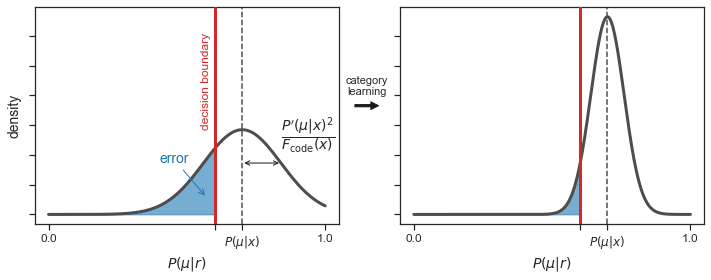

In [4]:
fh, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)
ax1 = axes[0]
ax1.axvline(xc, lw=1.5, ls='--', c='0.3')
ax1.plot(x, distrib_before(x), lw=3, c='0.3')
ax1.fill_between(xfill, 0*xfill, distrib_before(xfill), color='tab:blue', alpha=0.6)
ax1.axvline(decision_point, lw=3, c='tab:red', zorder=10)
ax1.set_xticks([0,decision_point,xc,1])
ax1.set_xticklabels([0., '', '$P(\mu|x)$', 1.])
ax1.set_yticklabels('')

ax2 = axes[1]
ax2.axvline(xc, lw=1.5, ls='--', c='0.3')
ax2.plot(x, distrib_after(x), lw=3, c='0.3')
ax2.fill_between(xfill, 0*xfill, distrib_after(xfill), color='tab:blue', alpha=0.6)
ax2.axvline(decision_point, lw=3, c='tab:red', zorder=10)

ax1.set_xlabel('$P(\mu|r)$')
ax2.set_xlabel('$P(\mu|r)$')

ylim = ax1.get_ylim()
ax1.annotate('', 
             xy=(1.2, 0.5*(ylim[1]-ylim[0])), 
             xytext=(1.1, 0.5*(ylim[1]-ylim[0])),
             arrowprops=dict(arrowstyle=ArrowStyle('simple',head_length=0.7,head_width=0.7),
                                edgecolor='.1',
                                facecolor='.1'),
             annotation_clip=False) 
ax1.text(x=1.15, 
         y=0.55*(ylim[1]-ylim[0]),
         s='category\nlearning',
         ha='center',
         fontstretch=0,
         fontsize=11) 
ax1.annotate('', 
             xy=(xc, distrib_before(xc+sig_before)), 
             xytext=(xc+sig_before, distrib_before(xc+sig_before)),
             arrowprops=dict(arrowstyle='<->',
                                edgecolor='.1',
                                facecolor='.1'),
             annotation_clip=False) 
ax1.text(x=xc+sig_before, 
         y=distrib_before(xc+sig_before)+0.1*(ylim[1]-ylim[0]),
         s=r"$\dfrac{P'(\mu|x)^2}{F_\mathrm{code}(x)}$",
         fontsize=14) 
ax1.text(x=decision_point-0.05, 
         y=0.4*(ylim[1]-ylim[0]),
         s="decision boundary", 
         rotation=90,
         fontsize=12,
         color='tab:red') 
ax1.annotate('error', 
             xy=(decision_point-0.03, distrib_before(decision_point-0.15)), 
             xytext=(decision_point-0.2, distrib_before(decision_point-0.04)),
             arrowprops=dict(arrowstyle='->',
                                edgecolor='tab:blue',
                                facecolor='tab:blue'),
             fontsize=14,
             color='tab:blue') 

ax1.set_ylabel('density')

fh.savefig('fig/posterior_estimation.pdf', bbox_inches='tight')